# Streaming, TV, and Sports
*By: Siddharth Srikanth and Vishal Bailoor*

We sought to discover the true effect of streaming on TV by looking at changes in TV show ratings and sports programming ratings over time. TV show data captures the comparable set of programming to a Netflix or Amazon Video. Sports, meanwhile, has historically been popular and tied to a live experience. The media has trumpeted the effect of streaming on TV, including sports programming, and we wanted to see what the data has to say.

# Part I: Sports Ratings

**Introduction: The Death of Television (may have been greatly exaggerated)**

The rise of Netflix and Amazon Video have dominated the news for a number of years, alongside concurrent trends like cord-cutting, streaming, and the decline of media and cable television. Logic would suggest the two are connected, that the rise of convenient, centralized streaming would itself harm current media, especially TV. Netflix statistics are used here as a proxy for streaming numbers, as a market-dominant firm.

We sought to answer two key questions surrounding this emerging trend. 

#1. **What effect has the rise of Netflix and streaming video had on conventional television?**

Key metrics here include [INSERT KEY METRICS HERE SID]

#2. **To what extent has sports viewership been affected by the rise of streaming?**

Key metrics here include *ratings numbers*, *viewership numbers*, *year-over-year change*, and *weekly and yearly numbers*.

**Data**

Question 1:

[Fill in Data Methodology]

Question 2:

Sports are a very different phenomenon from the remainder of network TV, which the other portion of the project covers. Sports are consistently higher rated across channels, are less channel-specific, and on a business side have separate media rights contracts to production shows.

This part draws from a number of web sources. The bulk of the data comes from http://www.sportsmediawatch.com/nfl-tv-ratings-viewership-nbc-cbs-fox-espn-nfln-regular-season-playoffs/. This data is on 2014-current ratings and viewership for various football matches. Additional data has been filled in from ESPN.com (which reports viewers/ratings for certain high-ticket games) and http://tvbythenumbers.zap2it.com/tag/nfl-football-ratings/. The latter source was primarily used to fill in unreported games from sportsmediawatch.

SportsMediaWatch("SMW") provides week-by-week data. We then manually downloaded and cleaned the data from 2014-now. 2013 data can be derived from the change numbers in 2014, but we also got comparable raw 2013 data from TV-by-the-numbers. ESPN.com served as a fact-check for blue-chip games. 

Operationally, we first downloaded the raw data in CSV form from sportsmediawatch. The CSV link on a public Github file is below. We then cleaned it and organized it in this notebook.

In [1]:
import sys                         
import pandas as pd                
import matplotlib as mpl           
import matplotlib.pyplot as plt      
import datetime as dt               

In [2]:
url = "https://raw.githubusercontent.com/vishbail/DB-Final-Project/master/DB%20Final%20Project%20Data%20Raw.csv"

#sdf stands for sports data frame, distinguished from the non sports data frame
sdf = pd.read_csv(url)

In [3]:
#remove all internal header rows - found through unfortunate trial and error
sdf = sdf.drop(sdf.index[80:82])
sdf = sdf.drop(sdf.index[186:188])
sdf = sdf.drop(sdf.index[293:294])

In [4]:
##Part 0: Cleaning and Summarizing Data

# drop unnecessary first row
sdf = sdf.drop(sdf.index[0:1])

#drop empty end columns
sdf = sdf.drop(sdf.columns[8:], axis=1)


#Sets internal column headers into overall headers
sdf.columns = sdf.iloc[0]
sdf = sdf.drop(sdf.index[0])

###failed column change attempts (remove/ignore)
#sdf["Year"][2:3] = 2015
#sdf.iloc[9][2:3] = 2015
#for i in range(2,79):
 #   sdf.set_value(2, 9, 2015)s

#Rename Unclear columns
sdf.columns.values[3] = "Vwrs. Change"
sdf.columns.values[5] = "Rtg. Change"

#drop rows with no game ratings and convert others to floats
sdf = sdf.dropna(subset = ["Rtg."])
sdf["Rtg."] = sdf["Rtg."].astype(float)
sdf = sdf.dropna(subset = ["Vwrs."])
sdf["Vwrs."] = sdf["Vwrs."].astype(float)
sdf = sdf.dropna(subset = ["Week"])
sdf["Week"] = sdf["Week"].astype(int)

sdf = sdf.set_index(["Year","Week"])

### Part 1: Sports. Sports Never Changes.

The rise of Netflix and Amazon Video have dominated the news for a number of years, alongside concurrent trends like cord-cutting, streaming, and the decline of media and cable television. We drew from SportsMediaWatch and ESPN data to test our hypothesis:

Given cord-cutting and a turn from television to streaming, consumption of sports on conventional channels will decrease.

This first figure makes a simple line plot of ratings data against time. 

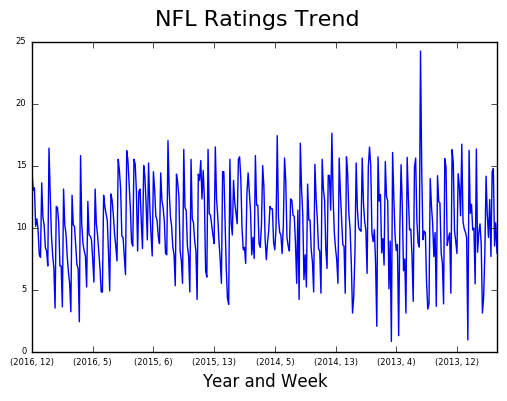

In [5]:
fig = plt.figure()
sdf["Rtg."].plot(fontsize=6)
fig.suptitle("NFL Ratings Trend", fontsize=16)
plt.xlabel("Year and Week", fontsize=12)
plt.show()

Surprisingly, this heartbeat-esque plot shows that there is little or no change over time, with the range of starting and ending ratings being within the same 8-15 range. Perhaps gross viewership, a component of ratings (which are at least partially driven by percentage of viewers watching) but a separate statistic, shows a different story?

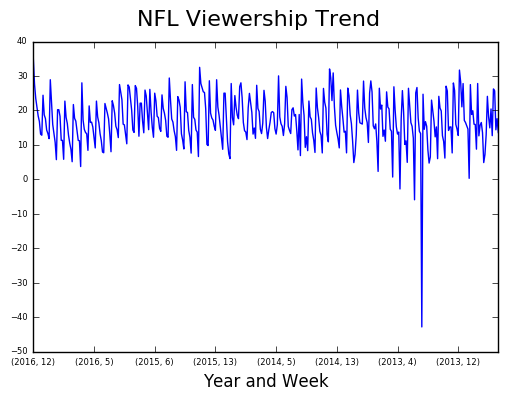

In [6]:
fig1 = plt.figure()
sdf["Vwrs."].plot(fontsize=6)
fig1.suptitle("NFL Viewership Trend", fontsize=16)
plt.xlabel("Year and Week", fontsize=12)
plt.show()

Aside from an aberrative number in the fall of 2013 (negative viewers would certainly be bad for TV), viewership numbers have at least weakly increased since 2013, with a good portion of 2013 under or around 10 million viewers and almost all of 2014-2015 above it, though 2016 appears to show decline.

Netflix, though has been strong over the same period. A look at (manually summarized) subscriber numbers shows this:

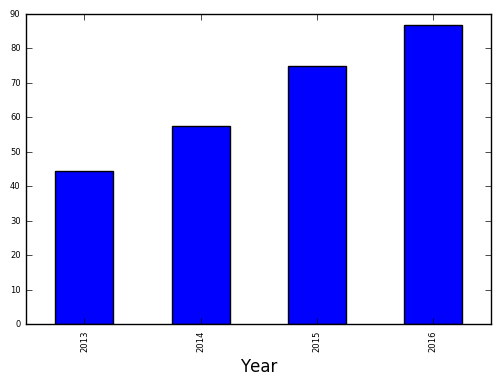

In [7]:
##ndf stands for netflix data frame
#data sourced from https://www.statista.com/statistics/250934/quarterly-number-of-netflix-streaming-subscribers-worldwide/
ndf = pd.DataFrame(dict(subscribers = pd.Series([44.35, 57.39, 74.76, 86.74]), year = pd.Series([2013,2014,2015,2016])))
ndf = ndf.set_index(ndf["year"])
ndf = ndf.drop(ndf.columns[1], axis=1)
ndf

fig2 = plt.figure()
ndf["subscribers"].plot(fontsize=6, kind="bar")
fig.suptitle("Netflix Subscriber Data", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.show()

Netflix subscribers have almost doubled over the same time period, indicating that though Netflix has grown, it has certainly not come at the expense of sports. Sports ratings and viewership are steady, and small inter-week fluctuations aside, sports programming shows no sign of change in this age of Netflix.

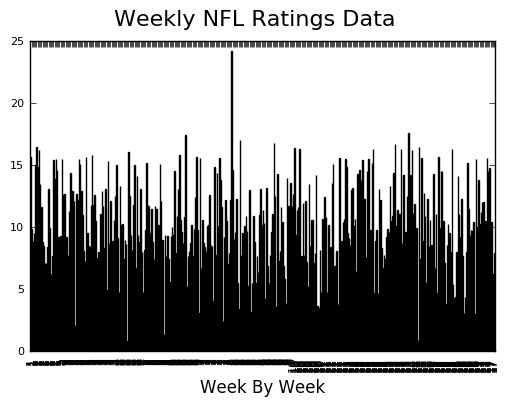

In [8]:
sdf = sdf.reset_index()

sdf = sdf.sort_values(by="Year")
sdf = sdf.sort_values(by="Week")

sdf = sdf.set_index(["Week"]) 

fig3 = plt.figure()
sdf["Rtg."].plot(fontsize=8, kind="bar")
fig3.suptitle("Weekly NFL Ratings Data", fontsize=16)
plt.xlabel("Week By Week", fontsize=12)
plt.show()

(Apologies for the nasty x-axis labeling, I tried to fix it for over an hour and abjectly failed. Essentially the x axis tracks weeks over time.)

A small digression, we wanted to test if weekly numbers showed a pattern across years, for example if sports rating increased on holidays or when college is in session. As the bar graph above attests, there is little pattern in the weekly data, an especially odd thought given the hype around start-of-season games and end-of-season playoff-deciding games.

Though specific networks such as ESPN may or may not be declining, the data shows that cross-channel trends in sports viewership are relatively stable.

With viewership and ratings holding steady as Netflix rises, and knowing that weekly trends are not masking other patterns, we believe that **sports viewership has not been affected by streaming.**

# Part II: TV Watching & Opinions.

In [9]:
import sys                             # system module 
import pandas as pd                    # data package
import matplotlib.pyplot as plt # graphics module  
import datetime as dt                  # date and time module
import numpy as np                     # foundation for pandas 

%matplotlib inline                     

# check versions (overkill, but why not?)
print('Python version: ', sys.version)
print('Pandas version: ', pd.__version__)
print('Today: ', dt.date.today())

#I started by importing all the necessary packages.

Python version:  3.5.2 |Anaconda 4.2.0 (x86_64)| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
Pandas version:  0.19.0
Today:  2016-12-22


# AV Club Data

So, because of my inability to get Metacritic ratings per episode for TV shows, I chose to stick with one source for my tv ratings: The A/V Club. I was able to find the information courtesy of a post on r/dataisbeautiful with about 50-60 shows worth of information, including critic ratings, community rating, number of people who voted, etc. So before I used the critic data I needed, I decided to play around with the data and just see what I could find by messing around with it.

In [10]:
url = "http://jespajo.neocities.org/clubData.csv"
av = pd.read_csv(url)
avc = av.set_index(['show', 'season', 'epno'])
print(av.columns.values)
avc247 = avc.head(24)

['show' 'season' 'epno' 'epname' 'relepno' 'href' 'criticname' 'nratings'
 'critrating' 'commrating']


In [11]:
av.show.view

<bound method Series.view of 0              24
1              24
2              24
3              24
4              24
5              24
6              24
7              24
8              24
9              24
10             24
11             24
12             24
13             24
14             24
15             24
16             24
17             24
18             24
19             24
20             24
21             24
22             24
23             24
24             24
25             24
26             24
27             24
28             24
29             24
           ...   
17875     Younger
17876     Younger
17877     Younger
17878     Younger
17879     Younger
17880     Younger
17881     Younger
17882     Younger
17883     Younger
17884     Younger
17885     Younger
17886     Younger
17887     Younger
17888     Younger
17889     Younger
17890     Younger
17891     Younger
17892     Younger
17893     Younger
17894     Younger
17895     Younger
17896    Z Nation
17897    Z Nation

In [12]:
avc247
print(avc247.dtypes)

epname         object
relepno         int64
href           object
criticname     object
nratings      float64
critrating    float64
commrating    float64
dtype: object


The code above describes the following: how I got the data I'd be working with in terms of critical appraisal and began to modify it. The way the data was originally formatted, the index was just simple numbers. So, I changed the index to show, season, and episode number, in that order. So from there, I wanted to see if there was some consistent correlation between critical and community reviews. Was there consistent over or under-scoring?

In [13]:
avcomm = av.groupby(['show', 'season'])['commrating'].mean()
avcrit = av.groupby(['show', 'season'])['critrating'].mean()

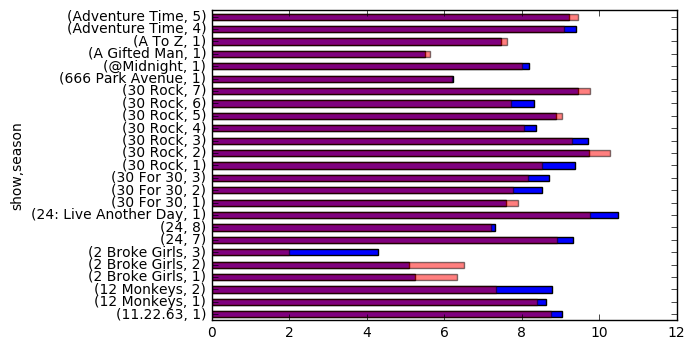

In [14]:
avcomm.head(25).plot.barh()
avcrit.head(25).plot.barh(alpha=0.5, color='red')

In [15]:
avcrit[20:40]

show                             season
@Midnight                        1          8.000000
A Gifted Man                     1          5.625000
A To Z                           1          7.615385
Adventure Time                   4          9.100000
                                 5          9.450000
                                 6          9.285714
                                 7          9.250000
Alcatraz                         1          8.230769
Alias                            1         11.000000
                                 2               NaN
Almost Human                     1          7.538462
Alphas                           1          8.181818
                                 2          8.692308
America's Best Dance Crew        7          9.600000
America's Next Great Restaurant  1          6.444444
America's Next Top Model         10         8.545455
                                 11         8.750000
                                 12         6.900000
      

In [16]:
avdiff = avcomm - avcrit
avdiff.sort_values(ascending=True)
avdiff.dropna().sort_values(ascending=True).head(10)

show                      season
Rock of Love              2        -6.615385
Frankenstein M.D.         1        -4.555556
Gossip Girl               4        -4.500000
Peter Pan Live!           1        -4.242647
The Wil Wheaton Project   1        -4.000000
Witches Of East End       2        -4.000000
America's Next Top Model  19       -3.438462
The Late Late Show        1        -3.384615
Steven Universe           2        -3.279881
The Sound Of Music Live!  1        -3.200000
dtype: float64

In [17]:
avc.T

show                                     24                                   \
season                                    7                                    
epno                                     1                                2    
epname           Day 7: 8:00 A.M.-9:00 A.M.      Day 7: 9:00 A.M.-10:00 A.M.   
relepno                                   1                                2   
href        /tvclub/24-800-am-1000-am-22203  /tvclub/24-800-am-1000-am-22203   
criticname                     Zack Handlen                     Zack Handlen   
nratings                                  2                                1   
critrating                               10                               10   
commrating                              9.5                               10   

show                                          \
season                                         
epno                                      3    
epname          Day 7: 10:00 A.M.-11:00 A.M.   
relepno                                    3   
href        /tvclub/24-1000-am-1200-pm-22238   
criticname                      Zack Handlen   
nratings                                   1   
critrating                                 8   
commrating                                 9   

show                                                                           \
season                                                                          
epno                                      4                                5    
epname          Day 7: 11:00 A.M.-12:00 P.M.      Day 7: 12:00 P.M.-1:00 P.M.   
relepno                                    4                                5   
href        /tvclub/24-1000-am-1200-pm-22238  /tvclub/24-1200-pm-100-pm-22862   
criticname                      Zack Handlen                     Zack Handlen   
nratings                                   1                                1   
critrating                                 8                                7   
commrating                                 9                                8   

show                                                                        \
season                                                                       
epno                                    6                               7    
epname          Day 7: 1:00 P.M.-2:00 P.M.      Day 7: 2:00 P.M.-3:00 P.M.   
relepno                                  6                               7   
href        /tvclub/24-100-pm-200-pm-23085  /tvclub/24-200-pm-300-pm-23330   
criticname                    Zack Handlen                    Zack Handlen   
nratings                                 1                               1   
critrating                               9                               9   
commrating                              10                               7   

show                                                                      \
season                                                                     
epno                                  8                               9    
epname        Day 7: 3:00 P.M.-4:00 P.M.      Day 7: 4:00 P.M.-5:00 P.M.   
relepno                                8                               9   
href        /tvclub/24-300pm-400pm-23625  /tvclub/24-400-pm-500-pm-23898   
criticname                  Zack Handlen                    Zack Handlen   
nratings                               1                               1   
critrating                            10                               8   
commrating                            10                               8   

show                                      \
season                                     
epno                                  10   
epname        Day 7: 5:00 P.M.-6:00 P.M.   
relepno                               10   
href        /tvclub/24-500pm-600pm-24278   
criticname                  Zack Handlen   
nratings                             NaN   
critrating   

In [18]:
avdiff.dropna().sort_values(ascending=True).tail(10)

show                       season
Workaholics                2         3.952381
Pickle and Peanut          1         4.333333
The Royals                 1         4.413793
Sharknado                  4         4.464286
Psych                      5         4.475000
The Jack And Triumph Show  1         5.389610
Sharknado                  3         5.409091
Gossip Girl                6         6.159794
The Big C                  4         6.382353
Ready For Love             1         8.333333
dtype: float64

In [19]:
avc248 = avc.T[('24', '8')].T
avc248

/Users/sglyon/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py:390: PerformanceWarning: indexing past lexsort depth may impact performance.
  user_expressions, allow_stdin)


,epname,relepno,href,criticname,nratings,critrating,commrating
epno,,,,,,,
1,Day 8: 4:00P.M. - 5:00P.M.,25,/tvclub/24-400pm-500pm500pm-600pm-37169,Zack Handlen,22,7,7.18182
2,Day 8: 5:00P.M. - 6:00P.M.,26,/tvclub/24-400pm-500pm500pm-600pm-37169,Zack Handlen,20,7,7.2
3,Day 8: 6:00P.M. - 7:00P.M.,27,/tvclub/24-600pm-700pm700pm-800pm-37214,Zack Handlen,23,9,8.82609
4,Day 8: 7:00P.M. - 8:00P.M.,28,/tvclub/24-600pm-700pm700pm-800pm-37214,Zack Handlen,23,9,8.95652
5,Day 8: 8:00P.M. - 9:00P.M.,29,/tvclub/24-800pm-900pm-37513,Zack Handlen,23,6,5.91304
6,Day 8: 9:00P.M. - 10:00P.M.,30,/tvclub/24-900pm-1000pm-37772,Zack Handlen,19,5,4.73684
7,Day 8: 10:00P.M. - 11:00P.M.,31,/tvclub/24-1000pm-1100pm-38024,Zack Handlen,26,7,6.57692
8,Day 8: 11:00P.M. - 12:00A.M.,32,/tvclub/24-1100pm-1200am-38252,Zack Handlen,16,9,8.0625
9,Day 8: 12:00A.M. - 1:00A.M.,33,/tvclub/24-1200am-100am-38495,Zack Handlen,21,9,8


In [20]:
e=avc.T[('How I Met Your Mother', '3')].T

/Users/sglyon/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py:390: PerformanceWarning: indexing past lexsort depth may impact performance.
  user_expressions, allow_stdin)


Now, this is just the data from the AVClub. I was having a lot of trouble installing IMDB and Metacritic packages on my computer. Once the packages install, I can query the sites and use their data to see if the AVClub is a consistent over- or under-scorer. In addition, with the TV ratings data Vishal has, I can look at the series broadcasting from 2013 onwards and compare viewership trends juxtaposed against quality. 

In [21]:
import pandas as pd             # data package
import matplotlib.pyplot as plt # graphics 
import datetime as dt           # date tools, used to note current date  
import sys

# these are new 
import requests

print('\nPython version: ', sys.version) 
print('Pandas version: ', pd.__version__)
print('Requests version: ', requests.__version__)
print("Today's date:", dt.date.today())


Python version:  3.5.2 |Anaconda 4.2.0 (x86_64)| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
Pandas version:  0.19.0
Requests version:  2.12.3
Today's date: 2016-12-22


In [22]:
import json
import pandas as pd

In [23]:
import pandas as pd
himymratings = pd.ExcelFile("C:/Users/Sidd/Desktop/Data_Bootcamp/TV Ratings.xlsx").parse()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Sidd/Desktop/Data_Bootcamp/TV Ratings.xlsx'

# PLEASE READ!
Hey Professors, so something odd happens with this following bit of code. The "a" variable basically generates a list of lists, but the ordering of those lists changes every time this notebook is opened for the first time. So, if you run this code and the graphs don't work, check the list ordering in 'a' and refill the values for the date, rating, title and number variables below, for the three shows that use this data. I know it's tedious and honestly bad this problem is occuring in the first place without a solution, but I couldn't find a solution in time, and would just let you know. Sorry in advance.

In [24]:
url = 'https://raw.githubusercontent.com/leosartaj/tvstats/master/data/jsonData/himym.json'
himym = pd.read_json(url)

himym.episodes[1]
a = [list(col) for col in zip(*[d.values() for d in himym.episodes[1]])]
himymdate1 = a[0]
himymrating1 = a[1]
himymtitle1 = a[2]
himymnumber1 = a[3]
himyms1 = pd.DataFrame(
    {'Episode Number': himymnumber1,
     'Episode Title': himymtitle1,
     'Rating': himymrating1
    })

himym.episodes[2]
a = [list(col) for col in zip(*[d.values() for d in himym.episodes[2]])]
himymdate2 = a[0]
himymrating2 = a[1]
himymtitle2 = a[2]
himymnumber2 = a[3]
himyms2 = pd.DataFrame(
    {'Episode Number': himymnumber2,
     'Episode Title': himymtitle2,
     'Rating': himymrating2
    })
  
himym.episodes[3]
a = [list(col) for col in zip(*[d.values() for d in himym.episodes[3]])]
himymdate3 = a[0]
himymrating3 = a[1]
himymtitle3 = a[2]
himymnumber3 = a[3]
himyms3 = pd.DataFrame(
    {'Episode Number': himymnumber3,
     'Episode Title': himymtitle3,
     'Rating': himymrating3
    })

himym.episodes[4]
a = [list(col) for col in zip(*[d.values() for d in himym.episodes[4]])]
himymdate4 = a[0]
himymrating4 = a[1]
himymtitle4 = a[2]
himymnumber4 = a[3]
himyms4 = pd.DataFrame(
    {'Episode Number': himymnumber4,
     'Episode Title': himymtitle4,
     'Rating': himymrating4
    })

himym.episodes[5]
a = [list(col) for col in zip(*[d.values() for d in himym.episodes[5]])]
himymdate5 = a[0]
himymrating5 = a[1]
himymtitle5 = a[2]
himymnumber5 = a[3]
himyms5 = pd.DataFrame(
    {'Episode Number': himymnumber5,
     'Episode Title': himymtitle5,
     'Rating': himymrating5
    })

himym.episodes[6]
a = [list(col) for col in zip(*[d.values() for d in himym.episodes[6]])]
himymdate6 = a[0]
himymrating6 = a[1]
himymtitle6 = a[2]
himymnumber6 = a[3]
himyms6 = pd.DataFrame(
    {'Episode Number': himymnumber6,
     'Episode Title': himymtitle6,
     'Rating': himymrating6
    })
 
himym.episodes[7]
a = [list(col) for col in zip(*[d.values() for d in himym.episodes[7]])]
himymdate7 = a[0]
himymrating7 = a[1]
himymtitle7 = a[2]
himymnumber7 = a[3]
himyms7 = pd.DataFrame(
    {'Episode Number': himymnumber7,
     'Episode Title': himymtitle7,
     'Rating': himymrating7
    })
     
himym.episodes[8]
a = [list(col) for col in zip(*[d.values() for d in himym.episodes[8]])]
himymdate8 = a[0]
himymrating8 = a[1]
himymtitle8 = a[2]
himymnumber8 = a[3]
himyms8 = pd.DataFrame(
    {'Episode Number': himymnumber8,
     'Episode Title': himymtitle8,
     'Rating': himymrating8
    })

himym.episodes[9]
a = [list(col) for col in zip(*[d.values() for d in himym.episodes[9]])]
himymdate9 = a[0]
himymrating9 = a[1]
himymtitle9 = a[2]
himymnumber9 = a[3]
himyms9 = pd.DataFrame(
    {'Episode Number': himymnumber9,
     'Episode Title': himymtitle9,
     'Rating': himymrating9
    })


a

[['7.7',
  '7.7',
  '7.5',
  '7.1',
  '7.1',
  '7.4',
  '7.1',
  '7.2',
  '8.3',
  '6.5',
  '5.5',
  '7.6',
  '8.2',
  '5.5',
  '8.4',
  '9.5',
  '8.1',
  '8.0',
  '7.6',
  '8.4',
  '8.3',
  '8.9',
  '6.9',
  '5.7'],
 ['The Locket',
  'Coming Back',
  'Last Time in New York',
  'The Broken Code',
  'The Poker Game',
  'Knight Vision',
  'No Questions Asked',
  'The Lighthouse',
  'Platonish',
  'Mom and Dad',
  'Bedtime Stories',
  'The Rehearsal Dinner',
  'Bass Player Wanted',
  'Slapsgiving 3: Slappointment in Slapmarra',
  'Unpause',
  'How Your Mother Met Me',
  'Sunrise',
  'Rally',
  'Vesuvius',
  'Daisy',
  'Gary Blauman',
  'The End of the Aisle',
  'Last Forever: Part One',
  'Last Forever: Part Two'],
 ['1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24'],
 ['23 Sep. 2013',
  '23 Sep. 2013',
  '30 Sep. 2013',
  '7 Oct. 2013',
  '14 Oct. 2013',
  '21

In [25]:
himymratings2 = himymratings.set_index(['Season', 'No. in Season'])
d = himymratings2.T[(8)].T
e = avc.T[('How I Met Your Mother', '8')].T

NameError: name 'himymratings' is not defined

/Users/sglyon/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


TypeError: Empty 'DataFrame': no numeric data to plot

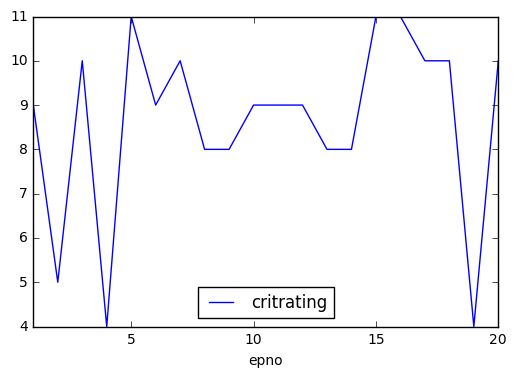

In [26]:
fig, axe = plt.subplots()
e.plot(y='critrating', ax=axe)
himyms8.Rating.convert_objects(convert_numeric = True).plot(ax=axe)

In [112]:
e.critrating - himyms8.Rating.convert_objects(convert_numeric = True)

C:\Users\Sidd\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


0     NaN
1     NaN
2     NaN
3     NaN
4    -1.3
5     1.6
6     2.7
7     0.6
8     0.6
9     1.1
10   -2.5
11    1.7
12    3.2
13    1.1
14   -2.1
15    2.5
16   -2.7
17      0
18    3.2
19      2
20    1.7
21   -1.5
22    1.6
23   -0.6
24    NaN
dtype: object

In [113]:
himyms1 = himyms1.set_index('Episode Number')
himyms2 = himyms2.set_index('Episode Number')
himyms3 = himyms3.set_index('Episode Number')
himyms4 = himyms4.set_index('Episode Number')
himyms5 = himyms5.set_index('Episode Number')
himyms6 = himyms6.set_index('Episode Number')
himyms7 = himyms7.set_index('Episode Number')
himyms8 = himyms8.set_index('Episode Number')
himyms9 = himyms9.set_index('Episode Number')

In [114]:
frames = [himyms1, himyms2, himyms3, himyms4, himyms5, himyms6, himyms7, himyms8, himyms9]
result = pd.concat(frames, keys=['Season 1', 'Season 2', 'Season 3', 'Season 4', 'Season 5', 'Season 6', 'Season 7', 'Season 8', 'Season 9'])
result

Episode Title Rating
         Episode Number                                                  
Season 1 1                                                   Pilot    8.5
         2                                          Purple Giraffe    8.2
         3                              The Sweet Taste of Liberty    8.2
         4                                     Return of the Shirt    8.1
         5                                            Okay Awesome    8.4
         6                                      The Slutty Pumpkin    8.2
         7                                              Matchmaker    7.8
         8                                                The Duel    8.2
         9                                    Belly Full of Turkey    8.1
         10                                 The Pineapple Incident    9.2
         11                                               The Limo    8.3
         12                                            The Wedding    8.2
         13                                       Drumroll, Please    8.7
         14                                          Zip, Zip, Zip    8.2
         15                                             Game Night    9.1
         16                                                Cupcake    7.9
         17                                Life Among the Gorillas    7.8
         18                        Nothing Good Happens After 2 AM    8.4
         19                                     Mary the Paralegal    8.8
         20                                         Best Prom Ever    7.9
         21                                                   Milk    8.2
         22                                                Come On    8.8
Season 2 1                                          Where Were We?    8.2
         2                               The Scorpion and the Toad    8.3
         3                                                  Brunch    8.5
         4                                    Ted Mosby, Architect    8.8
         5                                 World's Greatest Couple    8.8
         6                                          Aldrin Justice    8.2
         7                                                 Swarley    9.0
         8                                           Atlantic City    8.0
...                                                            ...    ...
Season 8 19                                           The Fortress    7.8
         20                                     The Time Travelers    8.0
         21                                         Romeward Bound    7.3
         22                                        The Bro Mitzvah    8.5
         23                                          Something Old    7.4
         24                                          Something New    8.6
Season 9 1                                              The Locket    7.7
         2                                             Coming Back    7.7
         3                                   Last Time in New York    7.5
         4                                         The Broken Code    7.1
         5                                          The Poker Game    7.1
         6                                           Knight Vision    7.4
         7                                      No Questions Asked    7.1
         8                                          The Lighthouse    7.2
         9                                               Platonish    8.3
         10                                            Mom and Dad    6.5
         11                                        Bedtime Stories    5.5
         12                                   The Rehearsal Dinner    7.6
         13                                     Bass Player Wanted    8.2
         14              Slapsgiving 3: Slappointment in Slapmarra    5.5
         15                                                Unpause    8.4
         16                                 How Your Moth

In [115]:
resultrating = result.Rating.convert_objects(convert_numeric = True)
resultrating['Season 8']

C:\Users\Sidd\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


Episode Number
1     8.5
2     7.3
3     7.3
4     7.4
5     7.3
6     7.4
7     7.3
8     7.4
9     7.4
10    7.9
11    8.5
12    9.3
13    7.8
14    7.9
15    8.1
16    7.5
17    7.7
18    8.0
19    7.8
20    8.0
21    7.3
22    8.5
23    7.4
24    8.6
Name: Rating, dtype: float64

# Hannibal

In [116]:
url = 'https://raw.githubusercontent.com/leosartaj/tvstats/master/data/jsonData/hannibal.json'
hannibal = pd.read_json(url)
hannibal.episodes[1]
a = [list(col) for col in zip(*[d.values() for d in hannibal.episodes[1]])]
hannibaldate1 = a[0]
hannibalrating1 = a[1]
hannibaltitle1 = a[2]
hannibalnumber1 = a[3]
hannibals1 = pd.DataFrame(
    {'Episode Number': hannibalnumber1,
     'Episode Title': hannibaltitle1,
     'Rating': hannibalrating1
    })

hannibal.episodes[2]
a = [list(col) for col in zip(*[d.values() for d in hannibal.episodes[2]])]
hannibaldate2 = a[0]
hannibalrating2 = a[1]
hannibaltitle2 = a[2]
hannibalnumber2 = a[3]
hannibals2 = pd.DataFrame(
    {'Episode Number': hannibalnumber2,
     'Episode Title': hannibaltitle2,
     'Rating': hannibalrating2
    })

hannibal.episodes[3]
a = [list(col) for col in zip(*[d.values() for d in hannibal.episodes[3]])]
hannibaldate3 = a[0]
hannibalrating3 = a[1]
hannibaltitle3 = a[2]
hannibalnumber3 = a[3]
hannibals3 = pd.DataFrame(
    {'Episode Number': hannibalnumber3,
     'Episode Title': hannibaltitle3,
     'Rating': hannibalrating3
    })

hannibals1 = hannibals1.set_index('Episode Number')
hannibals2 = hannibals2.set_index('Episode Number')
hannibals3 = hannibals3.set_index('Episode Number')

haframes = [hannibals1, hannibals2]
hannibalfinal = pd.concat(haframes, keys=['Season 1', 'Season 2'])

In [286]:
avhannibal = avc.T['Hannibal'].T


,Episode Title,Rating
Episode Number,,
1,Antipasto,None
2,Primavera,None
3,Secondo,None
4,Episode #3.4,None
5,Episode #3.5,None
6,Episode #3.6,None
7,Digestivo,None
8,The Great Red Dragon,None
9,...And the Woman Clothed in Sun,None


In [118]:
hannibaltvratings = pd.ExcelFile("C:/Users/Sidd/Desktop/Data_Bootcamp/TV Ratings.xlsx").parse(sheetname = 'Hannibal')
hannibaltvratings = hannibaltvratings.set_index('Number Overall')

# Breaking Bad

In [119]:
url = 'https://raw.githubusercontent.com/leosartaj/tvstats/master/data/jsonData/breakingBad.json'
bb = pd.read_json(url)

bb.episodes[1]
a = [list(col) for col in zip(*[d.values() for d in bb.episodes[1]])]
bbdate1 = a[0]
bbrating1 = a[1]
bbtitle1 = a[2]
bbnumber1 = a[3]
bbs1 = pd.DataFrame(
    {'Episode Number': bbnumber1,
     'Episode Title': bbtitle1,
     'Rating': bbrating1
    })

bb.episodes[2]
a = [list(col) for col in zip(*[d.values() for d in bb.episodes[2]])]
bbdate2 = a[0]
bbrating2 = a[1]
bbtitle2 = a[2]
bbnumber2 = a[3]
bbs2 = pd.DataFrame(
    {'Episode Number': bbnumber2,
     'Episode Title': bbtitle2,
     'Rating': bbrating2
    })

bb.episodes[3]
a = [list(col) for col in zip(*[d.values() for d in bb.episodes[3]])]
bbdate3 = a[2]
bbrating3 = a[0]
bbtitle3 = a[3]
bbnumber3 = a[1]
bbs3 = pd.DataFrame(
    {'Episode Number': bbnumber3,
     'Episode Title': bbtitle3,
     'Rating': bbrating3
    })

bb.episodes[4]
a = [list(col) for col in zip(*[d.values() for d in bb.episodes[4]])]
bbdate4 = a[0]
bbrating4 = a[1]
bbtitle4 = a[2]
bbnumber4 = a[3]
bbs4 = pd.DataFrame(
    {'Episode Number': bbnumber4,
     'Episode Title': bbtitle4,
     'Rating': bbrating4
    })

bb.episodes[5]
a = [list(col) for col in zip(*[d.values() for d in bb.episodes[5]])]
bbdate5 = a[0]
bbrating5 = a[1]
bbtitle5 = a[2]
bbnumber5 = a[3]
bbs5 = pd.DataFrame(
    {'Episode Number': bbnumber5,
     'Episode Title': bbtitle5,
     'Rating': bbrating5}
    )

bbs1
bbs1 = bbs1.set_index('Episode Number')     
bbs2

,Episode Number,Episode Title,Rating
0,1,Seven Thirty-Seven,7.9
1,2,Grilled,8.5
2,3,Bit by a Dead Bee,7.6
3,4,Down,7.5
4,5,Breakage,7.6
5,6,Peekaboo,8.1
6,7,Negro Y Azul,7.9
7,8,Better Call Saul,8.3
8,9,4 Days Out,8.2
9,10,Over,7.8


In [120]:
bbs1
bbs2 = bbs2.set_index('Episode Number')
bbs3 = bbs3.set_index('Episode Number')
bbs4 = bbs4.set_index('Episode Number')
bbs5 = bbs5.set_index('Episode Number')

bbframes = [bbs1, bbs2, bbs3, bbs4, bbs5]
bbfinal = pd.concat(bbframes, keys=['Season 1', 'Season 2', 'Season 3', 'Season 4', 'Season 5'])

bbfinal



Episode Title        Rating
         Episode Number                                             
Season 1 1                                       Pilot           8.5
         2                         Cat's in the Bag...           8.0
         3               ...And the Bag's in the River           8.1
         4                                  Cancer Man           7.7
         5                                 Gray Matter           7.7
         6                    Crazy Handful of Nothin'           8.5
         7                  A No-Rough-Stuff-Type Deal           8.1
Season 2 1                          Seven Thirty-Seven           7.9
         2                                     Grilled           8.5
         3                           Bit by a Dead Bee           7.6
         4                                        Down           7.5
         5                                    Breakage           7.6
         6                                    Peekaboo           8.1
         7                                Negro Y Azul           7.9
         8                            Better Call Saul           8.3
         9                                  4 Days Out           8.2
         10                                       Over           7.8
         11                                    Mandala           8.0
         12                                    Phoenix           8.4
         13                                        ABQ           8.4
Season 3 7.8                                         1  21 Mar. 2010
         7.8                                         2  28 Mar. 2010
         7.6                                         3   4 Apr. 2010
         7.5                                         4  11 Apr. 2010
         7.8                                         5  18 Apr. 2010
         8.4                                         6  25 Apr. 2010
         8.8                                         7    2 May 2010
         7.9                                         8    9 May 2010
         7.6                                         9   16 May 2010
         7.3                                        10   23 May 2010
...                                                ...           ...
         8.9                                        13  13 Jun. 2010
Season 4 1                                  Box Cutter           8.4
         2                           Thirty-Eight Snub           7.5
         3                                  Open House           7.4
         4                               Bullet Points           7.8
         5                                     Shotgun           7.8
         6                                    Cornered           7.6
         7                                 Problem Dog           8.0
         8                                    Hermanos           8.4
         9                                         Bug           8.0
         10                                      Salud           8.8
         11                                Crawl Space           9.0
         12                                  End Times           8.6
         13                                   Face Off           9.6
Season 5 1                            Live Free or Die           8.6
         2                                    Madrigal           8.2
         3                                  Hazard Pay           8.1
         4                                   Fifty-One           8.0
         5                                Dead Freight           9.1
         6                                      Buyout           8.2
         7                                 Say My Name           8.8
         8                            Gliding Over All           9.0
         9                                 Blood Money           8.8
         10                                     Buried           8.4
         11                                Confessions           9.0
         12                            

In [121]:
bbtvratings = pd.ExcelFile("C:/Users/Sidd/Desktop/Data_Bootcamp/TV Ratings.xlsx").parse(sheetname = 'Breaking Bad')
bbtvratings

,Number Overall,Season,No. in Season,Title,Directed By,Written By,Air Date,Ratings (in Millions)
0,1,1,1,"""Pilot""",Vince Gilligan,Vince Gilligan,"January 20, 2008",1.41
1,2,1,2,"""Cat's in the Bag...""",Adam Bernstein,Vince Gilligan,"January 27, 2008",1.49
2,3,1,3,"""...And the Bag's in the River""",Adam Bernstein,Vince Gilligan,"February 10, 2008",1.08
3,4,1,4,"""Cancer Man""",Jim McKay,Vince Gilligan,"February 17, 2008",1.09
4,5,1,5,"""Gray Matter""",Tricia Brock,Patty Lin,"February 24, 2008",0.97
5,6,1,6,"""Crazy Handful of Nothin'""",Bronwen Hughes,George Mastras,"March 2, 2008",1.07
6,7,1,7,"""A No-Rough-Stuff-Type Deal""",Tim Hunter,Peter Gould,"March 9, 2008",1.50
7,8,2,1,"""Seven Thirty-Seven""",Bryan Cranston,J. Roberts,"March 8, 2009",1.66
8,9,2,2,"""Grilled""",Charles Haid,George Mastras,"March 15, 2009",1.60
9,10,2,3,"""Bit by a Dead Bee""",Terry McDonough,Peter Gould,"March 22, 2009",1.13


In [122]:
avbb = avc.T['Breaking Bad'].T
bbtvratings = pd.ExcelFile("C:/Users/Sidd/Desktop/Data_Bootcamp/TV Ratings.xlsx").parse(sheetname = 'Breaking Bad')

bbtvratings = bbtvratings.set_index('Number Overall')

# Empire

In [123]:
empireavc = avc.T['Empire'].T
empireavc

epname relepno  \
season epno                                         
1      1                            Pilot       1   
       2               The Outspoken King       2   
       3       The Devil Quotes Scripture       3   
       4                 False Imposition       4   
       5                  Dangerous Bonds       5   
       6                 Out, Damned Spot       6   
       7                 Our Dancing Days       7   
       8                  The Lyon's Roar       8   
       9                  Unto the Breach       9   
       10              Sins of the Father      10   
       11                    Die But Once      11   
       12                The Newborn King      12   
2      1              The Devils Are Here      13   
       2                Without A Country      14   
       3                  Fires of Heaven      15   
       4                      Poor Yorick      16   
       5                          Be True      17   
       6     A High Hope For A Low Heaven      18   
       7                  True Love Never      19   
       8                     My Bad Parts      20   
       9                   Sinned Against      21   
       10                    Et Tu, Brute      22   
       11         Death Will Have His Day      23   
       12        A Rose by Any Other Name      24   
       13          The Tameness of a Wolf      25   
       14               Time Shall Unfold      26   
       15                   More Than Kin      27   
       16         The Lyon Who Cried Wolf      28   
       17                     Rise by Sin      29   
       18                Past Is Prologue      30   
3      1                Light in Darkness      31   
       4                      Cupid Kills      32   
       5               One Before Another      33   

                                                          href  \
season epno                                                      
1      1                           /tvclub/empire-pilot-213578   
       2                  /tvclub/empire-outspoken-king-213847   
       3          /tvclub/empire-devil-quotes-scripture-214176   
       4                /tvclub/empire-false-imposition-214503   
       5                 /tvclub/empire-dangerous-bonds-214812   
       6                 /tvclub/empire-out-damned-spot-215110   
       7                /tvclub/empire-our-dancing-days-215441   
       8                      /tvclub/empire-lyons-roar-215754   
       9                     /tvclub/empire-unto-breach-215984   
       10                    /tvclub/empire-sins-father-216441   
       11               /tvclub/empire-die-oncewho-i-am-216740   
       12               /tvclub/empire-die-oncewho-i-am-216740   
2      1     /tvclub/empire-returns-same-it-ever-was-better...   
       2     /tvclub/strong-episode-brings-empire-back-down...   
       3     /tvclub/empire-has-its-pedal-metal-and-its-whe...   
       4     /tvclub/empire-becoming-biggest-troll-televisi...   
       5     /tvclub/empire-muted-family-drama-trapped-insi...   
       6     /tvclub/empire-would-rather-burn-out-fade-away...   
       7     /tvclub/its-official-empires-second-season-rai...   
       8      /tvclub/rap-battle-brings-out-best-empire-228640   
       9     /tvclub/empire-fizzles-again-episode-manages-b...   
       10    /tvclub/empire-fritters-away-last-its-good-wil...   
       11    /tvclub/empire-back-along-its-constant-threat-...   
       12    /tvclub/well-damnso-much-empire-renaissance-23...   
       13       /tvclub/behold-return-earthbound-empire-235291   
       14    /tvclub/empire-reveals-latest-stupid-detail-ab...   
       15    /tvclub/empire-reminds-us-why-its-shame-title-...   
       16    /tvclub/finally-empire-right-kind-ridiculous-2...   
       17    /tvclub/empires-biggest-cliffhanger-season-rin...   
       18    /tvclub/empire-ended-its-rough-second-season-m...   
3      1     /tvclub/lucious-tried-court-his-familys-opinio...   
 

In [124]:
empireavc = avc.T['Empire'].T
empireavc
empiretvratings = pd.ExcelFile("C:/Users/Sidd/Desktop/Data_Bootcamp/TV Ratings.xlsx").parse(sheetname = 'Empire')
empiretvratings['IMDb Rating']

0     8.1
1     8.2
2     8.2
3     8.3
4     8.6
5     8.4
6     8.8
7     8.9
8     9.0
9     8.5
10    8.4
11    8.5
12    8.2
13    8.2
14    8.2
15    8.4
16    8.1
17    8.0
18    8.2
19    8.6
20    8.5
21    9.2
22    8.5
23    8.3
24    8.3
25    8.2
26    7.9
27    8.7
28    9.2
29    8.1
Name: IMDb Rating, dtype: float64

# Critical & Community Differences.
## Which episodes were the most divisive?

Now that we have all the data, it's time to plot. First, let's see if there's any correlation between critical appraisal and community appraisal.

In [125]:
f = avc.T[('How I Met Your Mother', '3')].T
pet1 = himyms1.reset_index()
afs = f.reset_index()
himyms3diff = pet1.Rating.convert_objects(convert_numeric = True) - afs.critrating + 1

f = avc.T[('How I Met Your Mother', '4')].T
pet = himyms4.reset_index()
afs = f.reset_index()
pet1 = pet.drop(pet.index[[0,1,2, 3]]).reset_index()
himyms4diff = pet1.Rating.convert_objects(convert_numeric = True) - afs.critrating + 1

f = avc.T[('How I Met Your Mother', '5')].T
pet = himyms5.reset_index()
afs = f.reset_index()
pet1 = pet.drop(pet.index[[0,1,2,3]]).reset_index()
himyms5diff = pet1.Rating.convert_objects(convert_numeric = True) - afs.critrating + 1

f = avc.T[('How I Met Your Mother', '6')].T
pet = himyms6.reset_index()
afs = f.reset_index()
pet1 = pet.drop(pet.index[[0,1,2,3]]).reset_index()
himyms6diff = pet1.Rating.convert_objects(convert_numeric = True) - afs.critrating + 1

f = avc.T[('How I Met Your Mother', '7')].T
pet = himyms7.reset_index()
afs = f.reset_index()
pet1 = pet.drop(pet.index[[0,1,2, 23]]).reset_index()
himyms7diff = pet1.Rating.convert_objects(convert_numeric = True) - afs.critrating + 1

e = avc.T[('How I Met Your Mother', '8')].T
prt = himyms8.reset_index()
ads = e.reset_index()
prt1 = prt.drop(prt.index[[0,1,2]])
prt1 = prt1.reset_index()
himyms8diff = prt1.Rating.convert_objects(convert_numeric = True) - ads.critrating + 1
himyms8diff.sort_values()

f = avc.T[('How I Met Your Mother', '9')].T
pet = himyms9.reset_index()
afs = f.reset_index()
pet1 = pet.drop(pet.index[[0,1,2]]).reset_index()
himyms9diff = pet1.Rating.convert_objects(convert_numeric = True) - afs.critrating + 1


C:\Users\Sidd\Anaconda3\lib\site-packages\ipykernel\kernelbase.py:390: PerformanceWarning: indexing past lexsort depth may impact performance.
  user_expressions, allow_stdin)
C:\Users\Sidd\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Sidd\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Sidd\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Sidd\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\

In [126]:
himymframes = [himyms3diff, himyms4diff, himyms5diff, himyms6diff, himyms7diff, himyms8diff, himyms9diff]

himymdifffinal = pd.concat(himymframes, keys=['Season 3', 'Season 4', 'Season 5', 'Season 6', 'Season 7', 'Season 8', 'Season 9'])

himymdifffinal.dropna().sort_values()

Season 9  10   -3.5
          7    -3.5
          4    -2.8
Season 4  15   -2.3
Season 3  15   -2.1
Season 4  1      -2
Season 9  14     -2
Season 5  10     -2
Season 8  14     -2
Season 9  13   -1.9
Season 5  17   -1.8
Season 4  12   -1.7
Season 9  17   -1.7
          5    -1.7
          2    -1.6
Season 4  8    -1.6
          9    -1.6
Season 3  4    -1.6
Season 6  9    -1.6
Season 8  2    -1.6
Season 9  6    -1.5
Season 8  7    -1.5
Season 9  8    -1.4
Season 6  12   -1.4
Season 7  8    -1.3
Season 4  18   -1.3
Season 5  6    -1.2
          0    -1.2
          2    -1.2
Season 3  6    -1.2
               ... 
Season 6  14    1.2
Season 3  13    1.2
          7     1.2
Season 8  17    1.3
Season 6  19    1.4
Season 7  19    1.4
Season 5  19    1.4
Season 4  14    1.5
Season 5  14    1.6
Season 3  12    1.7
Season 5  16    1.7
Season 7  18    1.7
Season 5  11    1.8
Season 6  17    1.8
Season 9  18    1.9
Season 7  11      2
Season 5  18    2.2
Season 4  6     2.2
Season 8  0     2.4


In [127]:
f = avc.T[('Breaking Bad', '1')].T
pet = bbs1.reset_index()
afs = f.reset_index()
pet1 = pet.reset_index()
bbs1diff = pet1.Rating.convert_objects(convert_numeric = True) - afs.critrating + 1

f = avc.T[('Breaking Bad', '2')].T
pet = bbs2.reset_index()
afs = f.reset_index()
pet1 = pet.reset_index()
bbs2diff = pet1.Rating.convert_objects(convert_numeric = True) - afs.critrating + 1

f = avc.T[('Breaking Bad', '3')].T
pet = bbs3.reset_index()
afs = f.reset_index()
bbs3diff = pet1.Rating.convert_objects(convert_numeric = True) - afs.critrating + 1

f = avc.T[('Breaking Bad', '4')].T
pet = bbs4.reset_index()
afs = f.reset_index()
pet1 = pet.reset_index()
bbs4diff = pet1.Rating.convert_objects(convert_numeric = True) - afs.critrating + 1

f = avc.T[('Breaking Bad', '5')].T
pet = bbs5.reset_index()
afs = f.reset_index()
pet1 = pet.reset_index()
bbs5diff = pet1.Rating.convert_objects(convert_numeric = True) - afs.critrating + 1


bbframes = [bbs1diff, bbs2diff, bbs3diff, bbs4diff, bbs5diff]

bbdifffinal = pd.concat(bbframes, keys=['Season 1', 'Season 2', 'Season 3', 'Season 4', 'Season 5'])

bbdifffinal.dropna().sort_values()

C:\Users\Sidd\Anaconda3\lib\site-packages\ipykernel\kernelbase.py:390: PerformanceWarning: indexing past lexsort depth may impact performance.
  user_expressions, allow_stdin)
C:\Users\Sidd\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Sidd\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Sidd\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Sidd\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\

Season 3  4    -2.4
          2    -2.4
Season 2  2    -2.4
          4    -2.4
Season 3  9    -2.2
Season 2  9    -2.2
Season 3  6    -2.1
          0    -2.1
          5    -1.9
Season 5  5    -1.8
Season 3  8    -1.8
Season 2  8    -1.8
          7    -1.7
          11   -1.6
          12   -1.6
Season 3  12   -1.6
Season 5  11   -1.6
Season 3  11   -1.6
Season 2  3    -1.5
Season 1  5    -1.5
Season 4  1    -1.5
          11   -1.4
Season 1  4    -1.3
Season 4  3    -1.2
Season 5  8    -1.2
Season 2  0    -1.1
          6    -1.1
Season 3  10     -1
Season 5  7      -1
Season 4  10     -1
               ... 
          6      -1
Season 5  2    -0.9
Season 2  5    -0.9
Season 1  2    -0.9
Season 5  1    -0.8
          9    -0.6
          12   -0.6
Season 4  2    -0.6
Season 1  0    -0.5
Season 4  5    -0.4
          12   -0.4
Season 5  0    -0.4
Season 4  4    -0.2
          9    -0.2
Season 5  6    -0.2
          15   -0.1
          13   -0.1
          10      0
Season 4  8       0


In [128]:
g = avc.T[('Hannibal', '1')].T
pet = hannibals1.reset_index()
ags = g.reset_index()
pet1 = pet.reset_index()
hannibals1diff = pet1.Rating.convert_objects(convert_numeric = True) - ags.critrating + 1

g = avc.T[('Hannibal', '2')].T
pet = hannibals2.reset_index()
ags = g.reset_index()
pet1 = pet.reset_index()
hannibals2diff = pet1.Rating.convert_objects(convert_numeric = True) - ags.critrating + 1

hannibalframes = [hannibals1diff, hannibals2diff]
hannibaldifffinal = pd.concat(hannibalframes, keys=['Season 1', 'Season 2'])
hannibaldifffinal.dropna().sort_values()


C:\Users\Sidd\Anaconda3\lib\site-packages\ipykernel\kernelbase.py:390: PerformanceWarning: indexing past lexsort depth may impact performance.
  user_expressions, allow_stdin)
C:\Users\Sidd\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Sidd\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


Season 1  11   -1.2
          3    -1.1
Season 2  4    -0.9
          3    -0.9
Season 1  0    -0.7
Season 2  12   -0.7
Season 1  5    -0.4
Season 2  7    -0.3
Season 1  9    -0.2
Season 2  10    0.1
Season 1  4     0.1
Season 2  11    0.1
          1     0.1
          5     0.1
Season 1  1     0.3
          10    0.6
Season 2  2     0.9
          8     0.9
          0       1
Season 1  7       1
Season 2  6     1.1
Season 1  2     1.2
          8     1.4
          6     1.8
Season 2  9     2.1
dtype: object

In [129]:
empires1 = avc.T[('Empire', '1')].T
empires2 = avc.T[('Empire', '2')].T
empiretvratings = pd.ExcelFile("C:/Users/Sidd/Desktop/Data_Bootcamp/TV Ratings.xlsx").parse(sheetname = 'Empire')
empiretvratings

es1 = empires1.reset_index().critrating
es2 = empires2.reset_index().critrating
eframe = [es1, es2]
efinal = pd.concat(eframe)
beta = efinal.reset_index().critrating - empiretvratings['IMDb Rating']
beta.sort_values()

C:\Users\Sidd\Anaconda3\lib\site-packages\ipykernel\kernelbase.py:390: PerformanceWarning: indexing past lexsort depth may impact performance.
  user_expressions, allow_stdin)


21   -7.2
18   -6.2
26   -5.9
20   -4.5
15   -4.4
23   -4.3
1    -3.2
29   -3.1
17     -3
5    -2.4
28   -2.2
14   -2.2
8      -2
7    -1.9
6    -1.8
24   -1.3
12   -1.2
16   -1.1
4    -0.6
11   -0.5
10   -0.4
3    -0.3
25   -0.2
27    0.3
19    0.4
22    0.5
13    0.8
2     1.8
0     1.9
9     2.5
dtype: object

# Visualizing Critical Opinion against Ratings

The main point of this data project is to see if there is any immediate correlation between Television Ratings and critical opinion or community opinion. We have our data, so the most efficient way of going about this would be plotting a dot plot and getting some regression analysis of it done via Python.

### How I Met Your Mother

C:\Users\Sidd\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


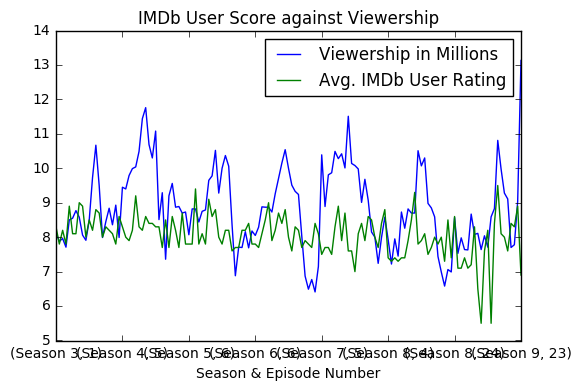

In [302]:
result = pd.concat(frames, keys=['Season 1', 'Season 2', 'Season 3', 'Season 4', 'Season 5', 'Season 6', 'Season 7', 'Season 8', 'Season 9'])

result = result.drop(['Season 1', 'Season 2',])
result = result.drop([('Season 4', '1'), ('Season 4', '2'), ('Season 4', '3'), ('Season 4', '4'), ('Season 4', '16')])
result = result.drop([('Season 5', '1'), ('Season 5', '2'), ('Season 5', '3'), ('Season 5', '4')])
result = result.drop([('Season 6', '1'), ('Season 6', '2'), ('Season 6', '3'), ('Season 6', '4')])
result = result.drop([('Season 7', '1'), ('Season 7', '2'), ('Season 7', '3')])
result = result.drop([('Season 8', '1'), ('Season 8', '2'), ('Season 8', '3')])
result = result.drop([('Season 9', '1'), ('Season 9', '2'), ('Season 9', '3'), ('Season 9', '24')])

i = avc.T['How I Met Your Mother'].T.critrating - 1
j = result.Rating
k = pd.ExcelFile("C:/Users/Sidd/Desktop/Data_Bootcamp/TV Ratings.xlsx").parse(sheetname = 'HIMYM for AVClub').set_index(['Season', 'No. in Season']).Rating

fig, axe = plt.subplots()
k.to_frame().plot(ax=axe)
j.convert_objects(convert_numeric=True).plot(ax=axe)
axe.set_title('IMDb User Score against Viewership')
axe.set_xlabel('Season & Episode Number')
axe.legend(['Viewership in Millions', 'Avg. IMDb User Rating'])

C:\Users\Sidd\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


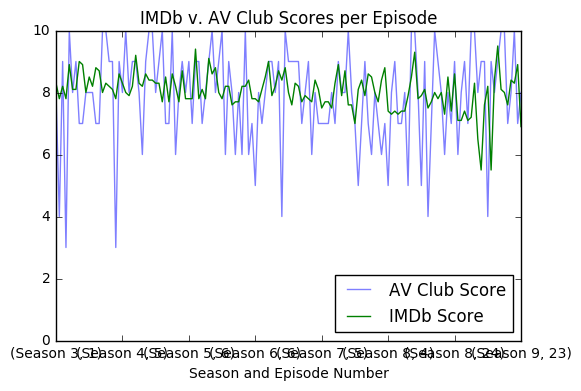

In [308]:
fig, axe = plt.subplots()
i.to_frame().plot(ax=axe, alpha = 0.5)
j.convert_objects(convert_numeric=True).plot(ax=axe)
axe.set_ylim(0, 10)
axe.set_xlabel('Season and Episode Number')
axe.set_title('IMDb v. AV Club Scores per Episode')
axe.legend(['AV Club Score', 'IMDb Score'], loc = 4)

C:\Users\Sidd\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
C:\Users\Sidd\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


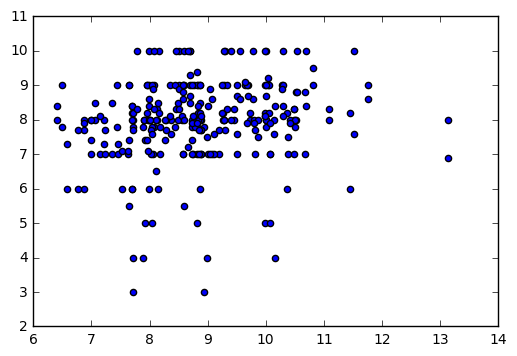

In [132]:
i2 = i.reset_index().critrating.convert_objects(convert_numeric=True)
j2 = j.reset_index().Rating.convert_objects(convert_numeric = True)
k2 = k.reset_index().Rating

plt.scatter(k2, j2)

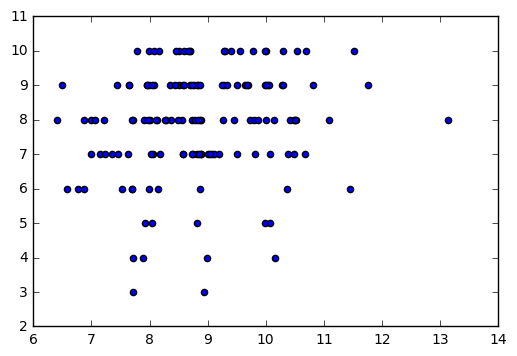

In [336]:
plt.scatter(k2, i2)


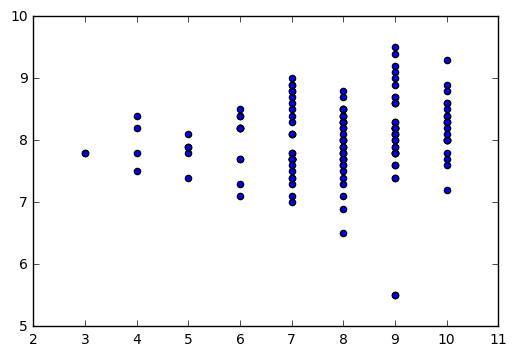

In [337]:
plt.scatter(i2, j2)

In [133]:
k2.describe()

count    141.000000
mean       8.860071
std        1.181586
min        6.410000
25%        8.000000
50%        8.770000
75%        9.730000
max       13.130000
Name: Rating, dtype: float64

In [134]:
i = 0
delta = []
for h in j2:
    while i < 140:
        d = j2[i+1] - j2[i] 
        delta.append(d)
        i = i + 1  

sum(delta)/len(delta)

-0.010000000000000002

So, what do these graphs show us? The graph that plots IMDb score against AV Club score shows us that the volatility of the AV Club's score is much higher than that of the IMDb score. Let's see if we can prove that with some numbers. The mean of the AV Club scores is 7.9, while the average IMDb score was 8.04. A 0.1 point difference exists, but I think the more interesting value to find would be the delta of successive episodes, i.e. how the rating changed for each successive episode, as well as a breakdown of the standard deviation of the show as a whole. So, beginning with the IMDb user score, we see that, for the series as a whole, the mean is 8.04 with a standard deviation of 0.61. 68% of episodes were rated between 7.43 and 8.65, showing the show as a whole was considered good, not great. What's more, the average change in "quality" for the series as a whole was -0.01, implying the show was more consistent in its quality.

What can we ascertain from this? Well, that HIMYM was a reliable show in its genre. The critical volatility contrasted with the less volatile community scores shows that while HIMYM had bad episodes, it was still an overall "reliable" show when it came to comedy. It wasn't offensively bad but it wasn't consistently phenomenal either. It, if anything, looks like the graph for any long-running live-action comedy show: "Friends", "Cheers", etc. "How I Met Your Mother" exists as our baseline, as our example for a show that had a solid fan following backed up by a decent critical opinion.

### Hannibal

In [287]:
himdb = hannibalfinal
havc = avc.T['Hannibal'].T
hannibaltvratings = pd.ExcelFile("C:/Users/Sidd/Desktop/Data_Bootcamp/TV Ratings.xlsx").parse(sheetname = 'Hannibal')
htvr = hannibaltvratings.set_index(['Season', 'No. in Season'])

n

Season  No. in Season
1       1                4.36
        2                4.38
        3                3.51
        4                 NaN
        5                2.40
        6                2.61
        7                2.62
        8                2.46
        9                2.69
        10               2.40
        11               2.36
        12               2.10
        13               1.98
2       1                3.27
        2                2.50
        3                2.47
        4                2.69
        5                3.49
        6                2.18
        7                2.25
        8                2.80
        9                2.45
        10               2.28
        11               1.95
        12               2.32
        13               2.35
3       1                2.57
        2                1.66
        3                1.69
        4                1.46
        5                1.23
        6                1.38
        7         

C:\Users\Sidd\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


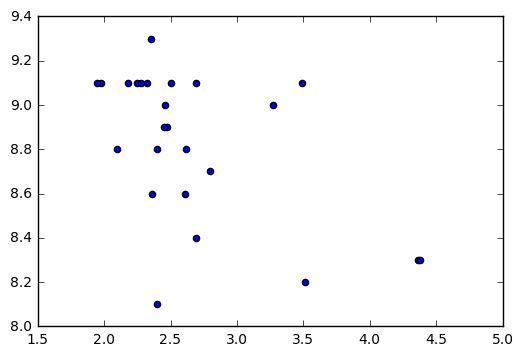

In [292]:
c = himdb.Rating
s = havc.critrating - 1
n = htvr.Rating

c2 = c.reset_index()
c3 = c2.Rating.convert_objects(convert_numeric=True)
n2 = n.drop(3).reset_index().Rating
plt.scatter(n2, c3)



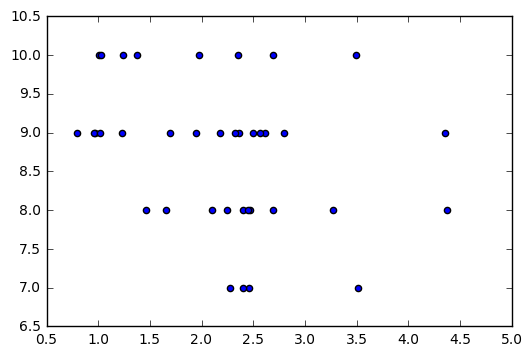

In [282]:
n3 = n.reset_index().drop(6).Rating
plt.scatter(n3, s)

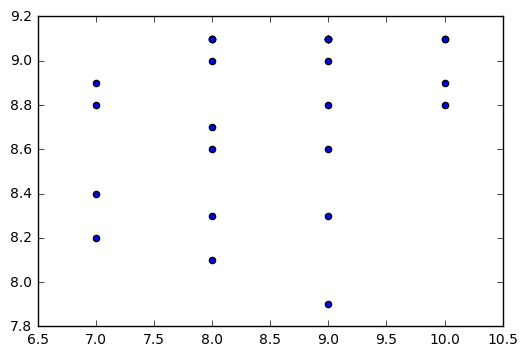

In [335]:
s4 = s.drop('3').reset_index().critrating
c4 = c3.drop(25)
plt.scatter(s4, c4)

C:\Users\Sidd\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


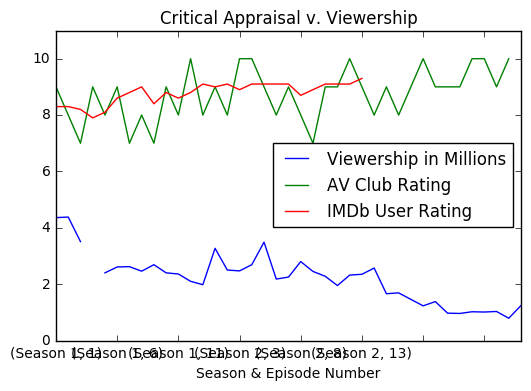

In [283]:
c = c.convert_objects(convert_numeric = True)
fig, axr = plt.subplots()
n.plot(ax=axr)
s.plot(ax=axr)
c.plot(ax=axr, color='red')
axr.set_ylim(0, 11)
axr.set_xlabel('Season & Episode Number')
axr.legend(['Viewership in Millions', 'AV Club Rating', 'IMDb User Rating'], loc = 5)
axr.set_title('Critical Appraisal v. Viewership')

C:\Users\Sidd\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


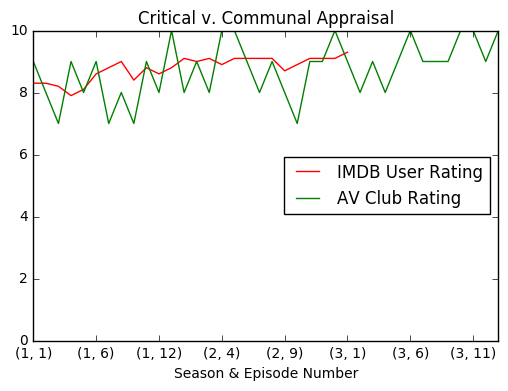

In [284]:
c = c.convert_objects(convert_numeric = True)
fig, axr = plt.subplots()
c.plot(ax=axr, color='red')
s.plot(ax=axr, color='green')
axr.set_ylim(0, 10)
axr.set_xlabel('Season & Episode Number')
axr.legend(['IMDB User Rating', 'AV Club Rating'], loc = 5)
axr.set_title('Critical v. Communal Appraisal')

In [164]:
i = 0
delta = []
for h in c:
    while i < 24:
        d = c[i+1] - c[i] 
        delta.append(d)
        i = i + 1    

c.mean()
sum(delta)/len(delta)


delta = []
i = 0
for f in s:
    while i < 24:
        d = s[i+1] - s[i] 
        delta.append(d)
        i = i + 1    
s.convert_objects(convert_numeric=True).mean()
sum(delta)/len(delta)

c.std()

C:\Users\Sidd\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


0.3777056240798361

Average user rating for Hannibal: 8.79. Average successive change: 0.03, Standard deviation for series as a whole, 0.38.

Average crit rating for Hannibal: 8.52. Average successive change: 0.04, Std: 0.38

Avg. viewers: 2.67 mil, with standard dev. of .647.

So, with "Hannibal", it's kind of clear to see viewership dived with Season 3, as the graph below shows. Each season had worse and worse viewership, despite the high review scores of the show and the evaluations of its fanbase. If anything, it appears "Hannibal" is an example of a show that was too niche. I think that, its audience initially bought into the case-of-the-week style show of Season 1, but as the show grew more and more serialized (e.g. episodes became more and more connected to one another, making it hard for a newcomer to "get into" the show), viewership dropped. There were very likely more factors that led to the show's demise, such as the emphasis on horror and grotesque imagery or the lack of big stars, but I think that by changing each season, from a set of cases wrapped in an overarching story to just one big overarching story, it left new fans unable to join the viewerbase while testing caught-up fans with its unique pacing. 

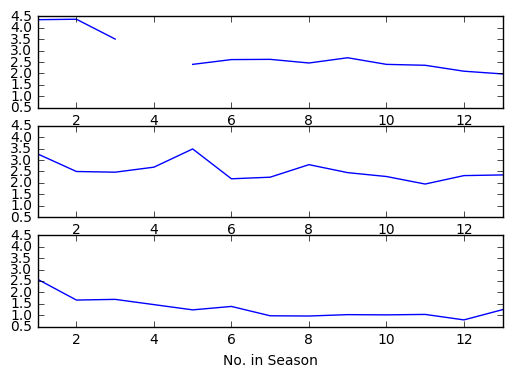

In [298]:
fig, axe = plt.subplots(nrows=3, ncols=1, sharey = True)
n[1].plot(ax=axe[0])
n[2].plot(ax=axe[1])
n[3].plot(ax=axe[2])

### Breaking Bad

C:\Users\Sidd\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


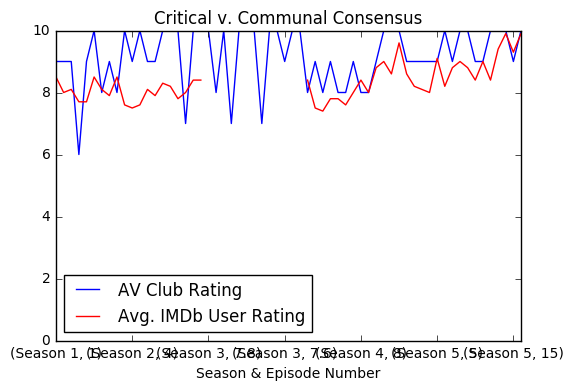

In [141]:
bbac = avc.T['Breaking Bad'].T.critrating - 1
bbtvr = bbtvratings['Ratings (in Millions)']
bbimdb = bbfinal.Rating

fig, axt = plt.subplots()
bbac.plot(ax=axt)
bbimdb.convert_objects(convert_numeric = True).plot(ax=axt, color='red')
axt.set_ylim(0, 10)
axt.set_xlabel('Season & Episode Number')
axt.legend(['AV Club Rating', 'Avg. IMDb User Rating'], loc = 3)
axt.set_title('Critical v. Communal Consensus')

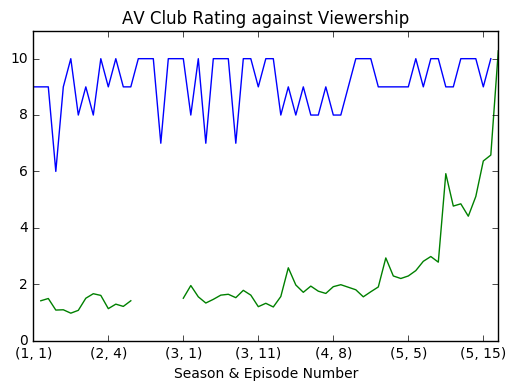

In [142]:
fig, axt = plt.subplots()
bbac.plot(ax=axt)
bbtvr.plot(ax=axt)
axt.set_ylim(0, 11)
axt.set_title("AV Club Rating against Viewership")
axt.set_xlabel('Season & Episode Number')


C:\Users\Sidd\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


(0, 12)

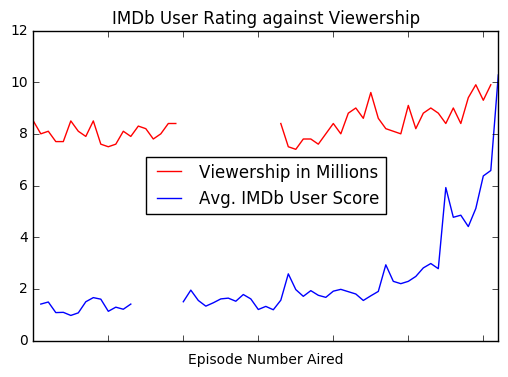

In [143]:
fig, axt = plt.subplots()
bbimdb.convert_objects(convert_numeric = True).plot(ax=axt, color='red')
bbtvr.plot(ax=axt)
axt.set_title('IMDb User Rating against Viewership')
axt.legend(['Viewership in Millions', 'Avg. IMDb User Score'], loc = 10)
axt.set_xticklabels('')
axt.set_xlabel('Episode Number Aired')
axt.set_ylim(0, 12)


C:\Users\Sidd\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


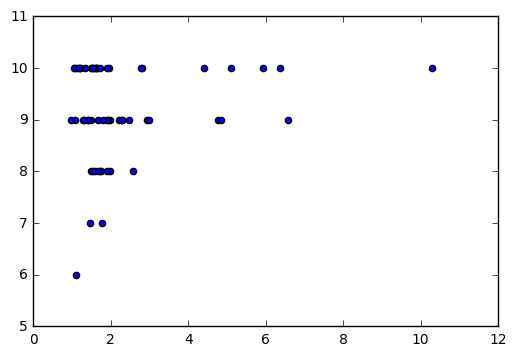

In [311]:
bbisc = bbimdb.reset_index().Rating.convert_objects(convert_numeric = True)
babcs = bbac.reset_index().critrating
plt.scatter(bbtvr, babcs)

From this we can see, the second half of Season 5 completely skews the scatter plot of the ratings against critical appraisal. So, if we omit the last half of the season, and look at it...

C:\Users\Sidd\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


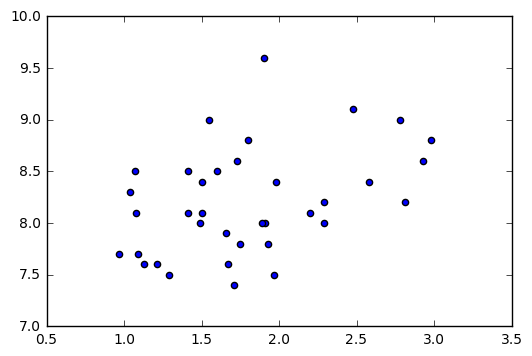

In [312]:
bbacs = babcs.drop([54, 55, 56, 57, 58, 59, 60, 61])
bbtvr4 = bbtvr.drop([55, 56, 57, 58, 59, 60, 61, 62])
bbimsc2 = bbimdb.reset_index().Rating.convert_objects(convert_numeric = True).drop([54, 55, 56, 57, 58, 59, 60, 61])


plt.scatter(bbtvr4, bbimsc2)

We see a scatter plot that appears to have some semblance of a correlation. Although any line of best fit would have a small R^2 value, it is still possible to see some correlation existed between viewership and quality. 

C:\Users\Sidd\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


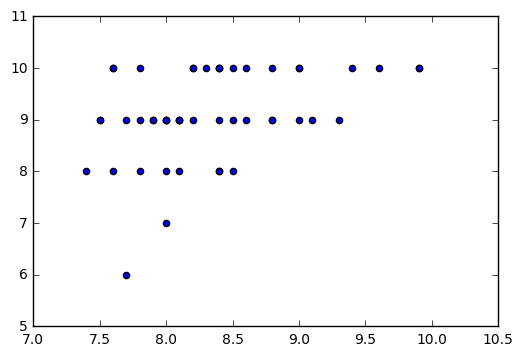

In [317]:
plt.scatter(bbimdb.reset_index().Rating.convert_objects(convert_numeric = True), babcs)

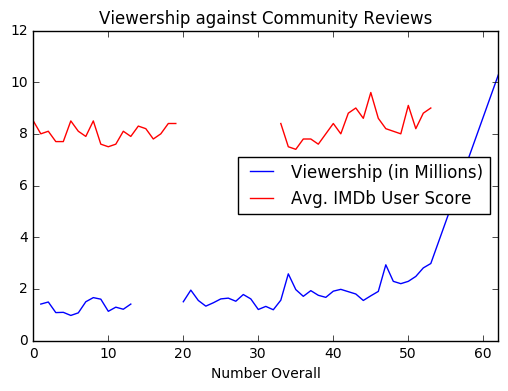

In [146]:
fig, axe = plt.subplots()
bbtvr4.plot(ax=axe)
bbimsc2.plot(ax=axe, color='red')
axe.legend(['Viewership (in Millions)', 'Avg. IMDb User Score'], loc=5)
axe.set_title('Viewership against Community Reviews')

What we see is in fact a more consistent viewerbase. The peaks and troughs of the average user's opinions on the show are much closer than those of other shows, so it can be hyothesized the consistency in quality also led to a consistency in viewership.

In [163]:
bbimsc2
i = 0
delta = []
for h in bbimsc2:
    while i < 53:
        d = bbimsc2[i+1] - bbimsc2[i] 
        delta.append(d)
        i = i + 1    
delta
bbimsc2.mean()
sum(delta)/len(delta)

bbacs.mean()
delta = []
i = 0
for h in bbacs:
    while i < 53:
        d = bbacs[i+1] - bbacs[i] 
        delta.append(d)
        i = i + 1    

bbtvr.describe()

C:\Users\Sidd\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    57.000000
mean      2.326140
std       1.718762
min       0.970000
25%            NaN
50%            NaN
75%            NaN
max      10.280000
Name: Ratings (in Millions), dtype: float64

In [ ]:
IMDB: mean = 8.34, std = 0.61, 
AV Club: mean 9.14, std = 0.96

From this what we see is, the largest dip in quality from successive episode is -1. This means that, even before the second half started airing, the average episode quality was 8.14 with an average "consistency", or average change in quality, of 0.01. Critically, the average rating per episode was a 9.07 with an average drop between episodes of 0.02, with the largest successive drop being 3 points. With this and the information in the cell above, it's apparent that "Breaking Bad" was an example of a show that maintained a high bar of quality, despite a small initial viewership. As the AVClub graph against ratings with S5 Pt. 2 included shows, the show had a conistent viewerbase that followed the show for seasons 1 - season 5 pt. 1. Suddenly, when S5 Pt. 2 premieres, the viewership spikes. 

My hypothesis for this is as follows: between Season 5 Part 1 and Season 5 Part 2, AMC scheduled a year-long break i.e. the finale of Pt. 1 aired in September 2012 and the premiere of Part 2 aired in August 2013. Because of this unexpected hiatus, AMC enabled fans of the show to spread the word about how good "Breaking Bad" was and gave new fans the time to catchup to the show. By letting the show' massive critical acclaim and word-of-mouth buzz converge, the show gained more and more fans. 

This is also why AMC did the same trick with Mad Men's final season, although in that case, it didn't workout as well for them as the premiere of Season 7 Pt. 1 and the premiere of Season 7 Pt. 2 attracted the same size audience. So, there was some x-factor about "Breaking Bad" that enabled the surge in fanbase between parts, and I believe it has something to do with "watercooler" moments. If I had Twitter data, I believe if you were to analyze the gaps between parts for "Mad Men" and "Breaking Bad", you'd find "Breaking Bad" would have a higher volume of hashtag usage than "Mad Men". I'd attribute it to the fact "Breaking Bad" is a show about definite action (e.g. guns being shot, lives being taken, etc), meaning it has moments that can hook new-comers easily (like "Did you see what Jesse did to Gale?" or "OMG that finale with the plane!"), while "Mad Men" is more about character and personal breakthrough, giving fans less moments to really talk about to convince people to watch the show.

### Empire

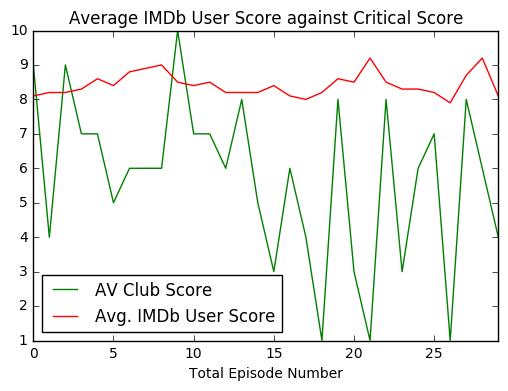

In [166]:
empireavc = avc.T['Empire'].T
empireavc
empiretvratings = pd.ExcelFile("C:/Users/Sidd/Desktop/Data_Bootcamp/TV Ratings.xlsx").parse(sheetname = 'Empire')
eavcsc = empireavc.critrating.drop(['3']) - 1
etvrsc = empiretvratings['Viewers (in millions)']
eimdbsc = empiretvratings['IMDb Rating']

eavsc1 = eavcsc.reset_index().critrating

fig, axy = plt.subplots()
eavsc1.plot(ax=axy, color='green')
eimdbsc.plot(ax=axy, color='red')
axy.set_title('Average IMDb User Score against Critical Score')
axy.set_xlabel('Total Episode Number')
axy.legend(['AV Club Score', 'Avg. IMDb User Score'], loc=3)

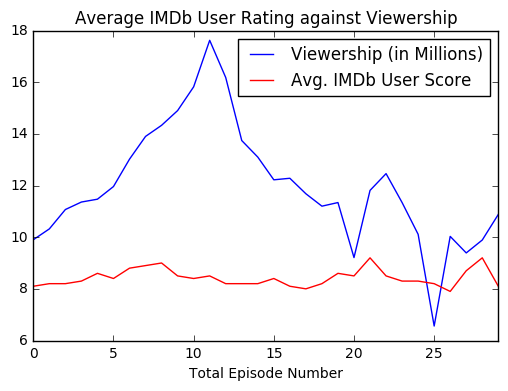

In [167]:
fig, axy = plt.subplots()
etvrsc.plot(ax=axy)
eimdbsc.plot(ax=axy, color='red')
axy.set_title('Average IMDb User Rating against Viewership')
axy.set_xlabel('Total Episode Number')
axy.legend(['Viewership (in Millions)', 'Avg. IMDb User Score'])

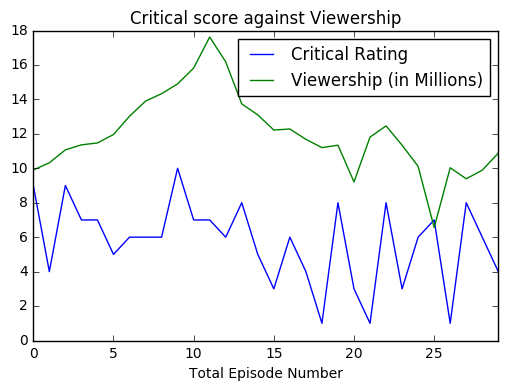

In [168]:
fig, axy = plt.subplots()
axy.set_title('Critical score against Viewership')
axy.set_xlabel('Total Episode Number')
axy.set_xlim(0, 12)
eavsc1.plot(ax=axy)
eavsc1.columns = ['AV Club Score']
etvrsc.plot(ax=axy)
axy.legend(['Critical Rating', 'Viewership (in Millions)'])

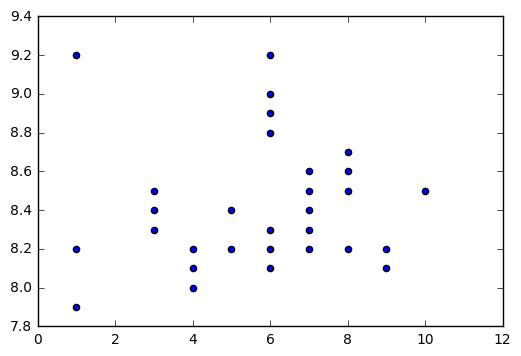

In [309]:
plt.scatter(eavsc1, eimdbsc)

In [207]:
i = 0
delta = []
for h in etvrsc:
    while i < 25:
        d = etvrsc[i+1] - etvrsc[i] 
        delta.append(d)
        i = i + 1    
delta
sum(delta[13:30])/len(delta[13:30])


-0.59833333333333338

Critics: mean was 5.7, std was 2.40, change during season 1 was -0.08, avg. change during season 2 was -0.08.

Communit: mean was 8.4, std was 0.33, change during season 1 was 0.08, avg. change during season 2 was 0.

Ratings: Season 1's delta was 0.3, season 2's was -0.598

So, from this, we can see that critics maintained a much harsher view of "Empire" than its fanbase did. Critics viewed the show as more volatile in quality. For seasons, even though through the average change per successive episode was small, what the graph shows is that the actual change per successive episode varies, with some episodes being huge drops in quality and other huge gainers. 

For the community, the graph backs up the numerical findings: namely that it was rated more consistently, hence showing it was viewed as a more quality-consistent show. Surprisingly enough though, even though the quality was constant throughout both seasons, viewership actively declined during the second season despite community members rating episodes on the same level as Season 1. Maybe this was because of the more volatile critics reviews which alternate between B grades and D grades, week in and week out.

# In Conclusion

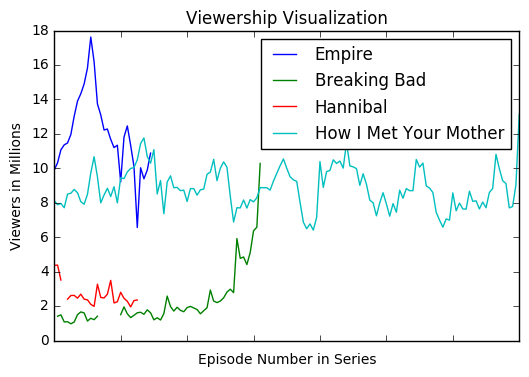

In [213]:
fig, axe = plt.subplots()
etvrsc.plot(ax=axe)
bbtvr.plot(ax=axe)
n.plot(ax=axe)
k.plot(ax=axe)
axe.legend(['Empire', 'Breaking Bad', 'Hannibal', 'How I Met Your Mother'])
axe.set_xticklabels('')
axe.set_xlabel('Episode Number in Series')
axe.set_ylabel('Viewers in Millions')
axe.set_title('Viewership Visualization')

The reason I made the graph about is just for you, the reader, to have context on the relative ratings of each of these series. As expected, the two shows on the networks with the lowest barrier to access have the largest ratings. "Empire" and "How I Met Your Mother" were also shows that belonged to very traditional television genres: the soap opera and the sitcom. It's widely acknowledged that the more "genre" your show is, the less audience it typically attracts e.g. a broad comedy like "How I Met Your Mother" will attract more viewers than a artistic horror-themed show like "Hannibal." In addition, Season 1 of "Empire" is  the only instance of a season on this chart where viewership every episode increases. Let's plot these seperately.

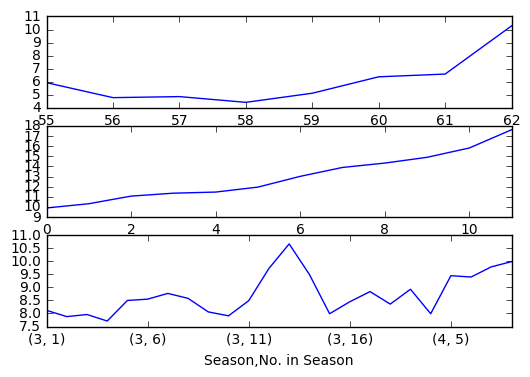

In [234]:
fig, axe = plt.subplots(nrows=3, ncols=1)
bbtvr[54:63].plot(ax=axe[0])
etvrsc[0:12].plot(ax=axe[1])
k[0:24].plot(ax=axe[2])

It is taken as gospel that the highest rating a TV show will get is during finales. And that reason generally remains true here. The anomaly, as you can see, remains in "HIMYM" Season 3. The reason for that episode in particular having such high viewership is likely because of the presence of Britney Spears, during her infamous 2007-08 period when she had her public meltdown. So, with the exception of notable event episodes (i.e. special guest stars), the statement has been proven true. 

With that in mind, the topmost graph, which is for "Breaking Bad" Season 5 Part 2, shows a dip throughout the season, same with "HIMYM" Season 3. And if I were to plot the rest of the seasons for the TV shows I'm examining, the presence of dips is almost guaranteed. In the past 5 years, only one show has had a season where viewership increased episode-to-episode, and that was "Empire" Season 1. If I had time, I'd have loved to examine the Twitter data to see the volume of hashtags associated with the show during the 2014-15 television season, to see if there was indeed a correlation between so-called "watercooler" moments and this show. No correlation could be found regarding critical opinion or community opinion and the show's ratings, so I'm left to hypothesize that the reason "Empire" bucked all those trends was because it was a soap opera that played predominantly to a segment of the population left ignored by traditional TV shows and that it had enough gasp-worthy moments to basically have people covert new watchers to the show by just talking about it. 

So, I began this project in the hopes, I'd find my beliefs validated: that there does exist some substantive correlation between viewership and critical data. In the end, it ended up being false. There exists no correlation between viewership and critical or popular opinion, neither does there really exist a correlation between critical and popular opinion. Instead, the elimination of these as reasons for popularity gives me insight into what I could do to build on this idea. Reviews can impact a show's viewing audience by convincing their reader to give a show a chance. But, critics are impersonal to us: we don't trust their beliefs because of who they are, rather it is because we trust the publication letting this person act as their offical opinion-giver. But, because of that impersonality, we don't really value their opinion all to highly compared to, say, a friend. Thus, what is the impact if a friend or a circle of friends give a positive opinion when compared to critics? If your friends like a show, say "Westworld", and talk about how much they like, does it make you more prone to watching the show compared to if a New York Times Arts reviewer says you should see it? That'd be an interesting experiment.